In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import mne

# Participant Overview

Here are the participants, totaling 88 individuals:

- **Alzheimer's Disease (AD) Group**: 36 participants
- **Frontotemporal Dementia (FTD) Group**: 23 participants
- **Healthy Controls (CN) Group**: 29 participants

## Dataset Access

The dataset is available at:

- [OpenNeuro Dataset ds004504](https://openneuro.org/datasets/ds004504/versions/1.0.8)

## Participant Details

- **Mini-Mental State Examination (MMSE) Scores**:

  - AD Group: Average MMSE = 17.75 (SD = 4.5)
  - FTD Group: Average MMSE = 22.17 (SD = 8.22)
  - CN Group: MMSE = 30

- **Mean Ages**:

  - AD Group: Mean Age = 66.4 years (SD = 7.9)
  - FTD Group: Mean Age = 63.6 years (SD = 8.2)
  - CN Group: Mean Age = 67.9 years (SD = 5.4)

- **Recording Durations**:

  - AD Group: Total = 485.5 minutes
  - FTD Group: Total = 276.5 minutes
  - CN Group: Total = 402 minutes

These recordings were collected using a clinical EEG system with 19 scalp electrodes, following the 10–20 international system. Each recording lasted approximately 13.5 minutes for the AD group, 12 minutes for the FTD group, and 13.8 minutes for the CN group.
The EEG recordings were exported in .eeg format and are transformed to BIDS accepted .set format for the inclusion in the dataset. ([mdpi.com](https://www.mdpi.com/2306-5729/8/6/95))

For more detailed information, please refer to the dataset description:

- [Dataset Description on GitHub](https://github.com/OpenNeuroDatasets/ds004504/blob/main/dataset_description.json)


In [2]:
participantsInfo = pd.read_table('./ds004504/participants.tsv')
print(participantsInfo.head())


  participant_id Gender  Age Group  MMSE
0        sub-001      F   57     A    16
1        sub-002      F   78     A    22
2        sub-003      M   70     A    14
3        sub-004      F   67     A    20
4        sub-005      M   70     A    22


In [3]:
male_count = (participantsInfo['Gender'] == 'M').sum()
female_count = (participantsInfo['Gender'] == 'F').sum()
print(male_count)
print(female_count)

44
44


Sampling frequency of the instance is already 500.0, returning unmodified.
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 500.0 Hz
>
High/Low pass: 0.0 Hz, 250.0 Hz


<Figure size 1200x800 with 0 Axes>

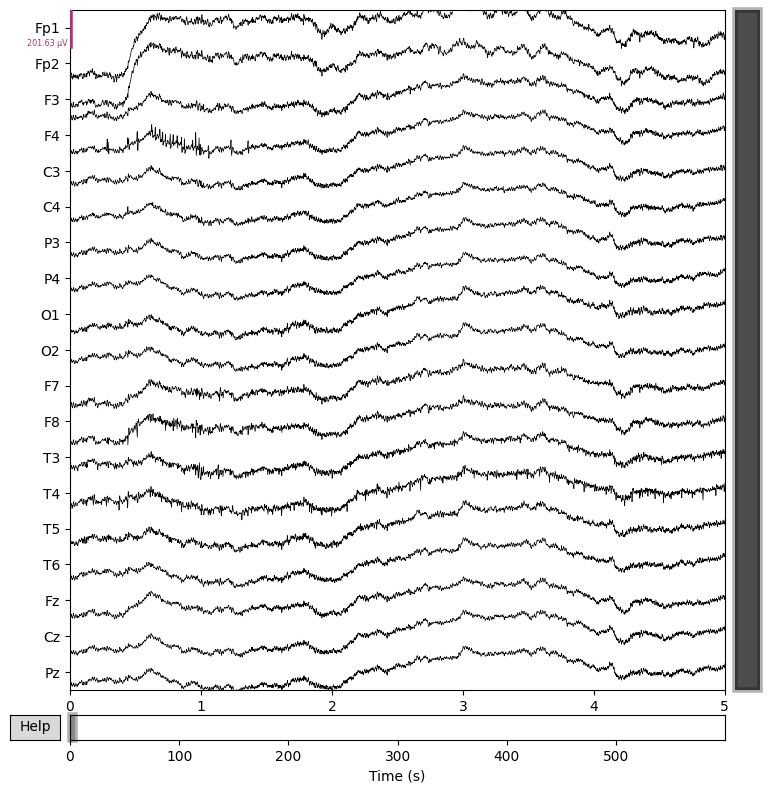

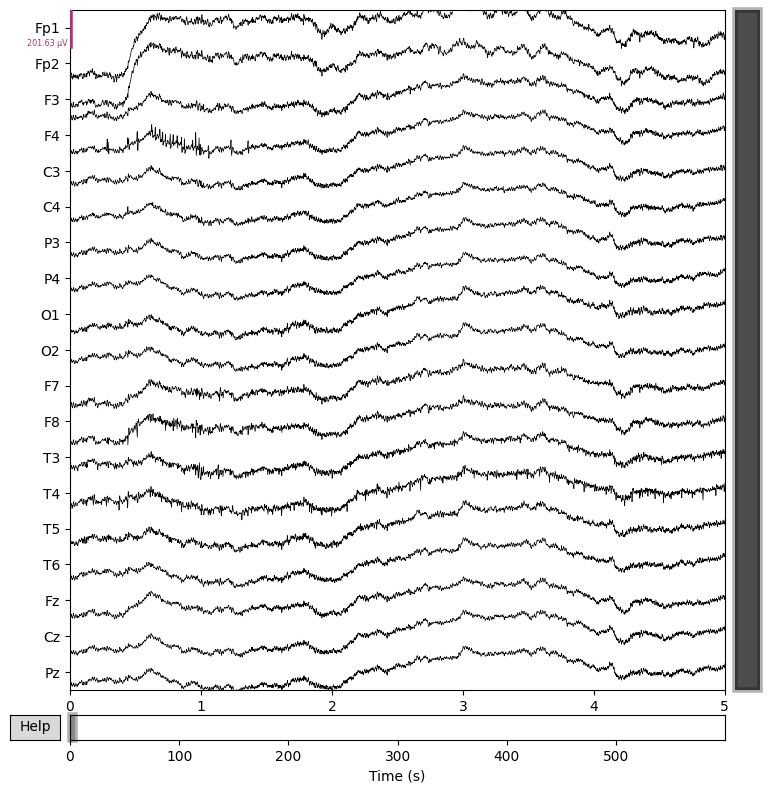

In [14]:
#testing import statments
import mne




# Load EEG dataset with `preload=True` to avoid read errors
# raw = mne.io.read_raw_eeglab("ds004504/sub-001/eeg/sub-001_task-eyesclosed_eeg.set", preload=True)
#raw = mne.io.read_raw_eeglab("/Users/admin/playground/sub-001_task-eyesclosed_eeg.set", preload=True)
raw = mne.io.read_raw_eeglab("ds004504/sub-001/eeg/sub-001_task-eyesclosed_eeg.set", preload=True)

# Set the correct montage (10-20 system)
raw.set_montage("standard_1020")

# Ensure the correct sampling frequency
raw.resample(500)  # Should match "SamplingFrequency": 500

#set the mongage to 10-20 electrodes
raw.set_montage("standard_1020")

# Set the correct reference (A1, A2)
#raw.set_eeg_reference(ref_channels=["A1", "A2"]) **this is already done in preprocessing , and the refernce channels were removed for post-processing

# Print info to confirm channels and settings
print(raw.info)
print("High/Low pass: %.1f Hz, %.1f Hz" % (raw.info["highpass"], raw.info["lowpass"]))# Plot EEG signals
# Set Matplotlib figure size BEFORE plotting
plt.figure(figsize=(12, 8))  # Adjust figure size

# Plot EEG signals
raw.plot(duration=5, n_channels=19, scalings="auto")


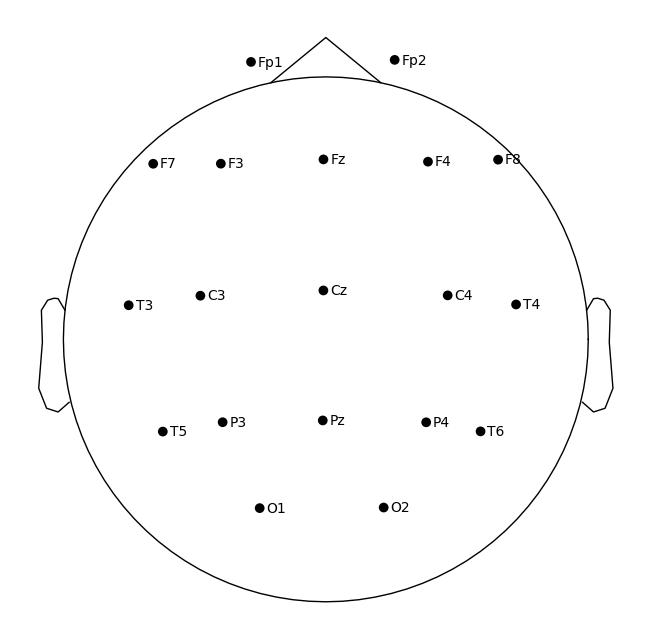

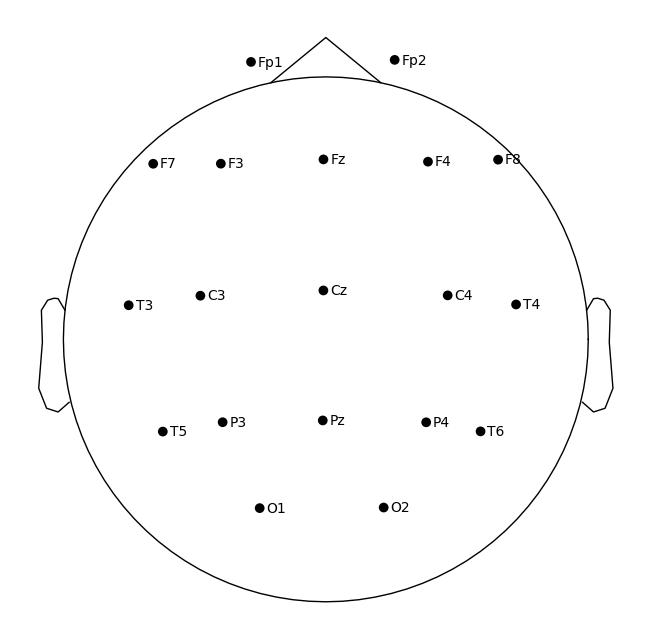

In [8]:
raw.plot_sensors(kind="topomap", show_names=True)